In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
import sklearn
import lightgbm as lgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
datapath ='/content/drive/My Drive/MachineHack_8_PartsData/'

In [ ]:
filename1 = 'Train.csv'
filename2 = 'Test.csv'
filename3 = 'Sample_Submission.xlsx'
sep = ','
train = pd.read_csv(datapath+filename1,index_col=None,sep=sep,parse_dates=['Date'])
test = pd.read_csv(datapath+filename2,index_col=None,sep=sep,parse_dates=['Date'])
final_submission = pd.read_excel(datapath+filename3,index_col=None)
print(train.shape)
print(test.shape)
print(final_submission.shape)

(2452, 8)
(1051, 7)
(1051, 1)


In [ ]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0


In [ ]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,2018-01-12
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,2012-12-20
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,2014-01-12
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,2019-01-12
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,2017-01-12


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        2452 non-null   object        
 1   Product_Brand  2452 non-null   object        
 2   Item_Category  2452 non-null   object        
 3   Subcategory_1  2452 non-null   object        
 4   Subcategory_2  2452 non-null   object        
 5   Item_Rating    2452 non-null   float64       
 6   Date           2452 non-null   datetime64[ns]
 7   Selling_Price  2452 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 153.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        1051 non-null   object        
 1   Product_Brand  1051 non-null   object        
 2   Item_Category  1051 non-null   object        
 3   Subcategory_1  1051 non-null   object        
 4   Subcategory_2  1051 non-null   object        
 5   Item_Rating    1051 non-null   float64       
 6   Date           1051 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 57.6+ KB


In [ ]:

train.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

In [ ]:
test.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
dtype: int64

In [ ]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [ ]:
df.isnull().sum()

Product             0
Product_Brand       0
Item_Category       0
Subcategory_1       0
Subcategory_2       0
Item_Rating         0
Date                0
Selling_Price    1051
train_or_test       0
dtype: int64

# Creating Required Date Features

In [ ]:
def create_date_featues(df):
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df['Day'] = pd.to_datetime(df['Date']).dt.day
    df['DayOfyear'] = pd.to_datetime(df['Date']).dt.dayofyear
    df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter 
    df['Is_month_start'] = pd.to_datetime(df['Date']).dt.is_month_start
    return df

In [ ]:
df=create_date_featues(df)

# Having a look into Item rating Feature

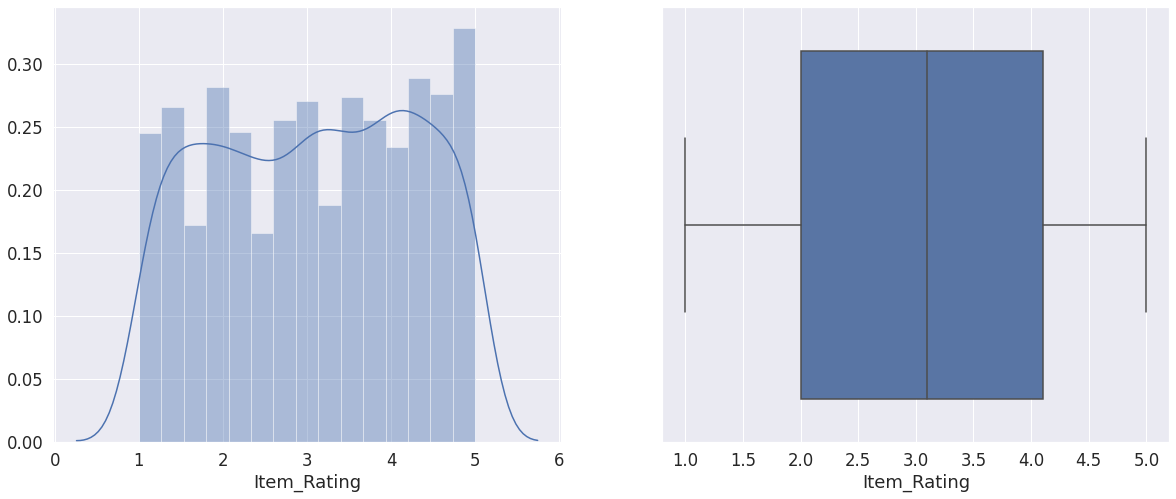

In [ ]:
sns.set(rc={'figure.figsize':(20,8)},font_scale=1.5)
f, axes = plt.subplots(1,2)
axes = axes.flatten()
sns.distplot(df["Item_Rating"],ax=axes[0])
sns.boxplot(df["Item_Rating"],ax=axes[1])

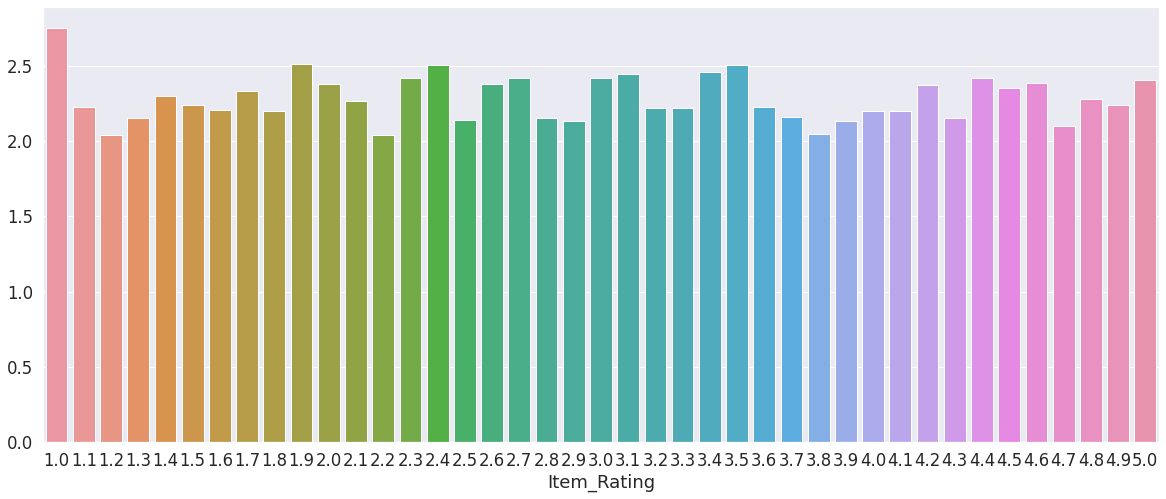

In [ ]:
x = df.groupby("Item_Rating")["Quarter"].mean().index
y=df.groupby("Item_Rating")["Quarter"].mean().values
sns.barplot(x,y)

In [ ]:
df.Quarter.value_counts()

1    1446
4    1007
2     600
3     450
Name: Quarter, dtype: int64

In [ ]:
#Will be using this afterwards
# train_df["SellPrice_per_ItemRating"] = train_df["Selling_Price"]/train_df.groupby(['Item_Rating'])['Selling_Price'].transform('mean')
# test_df["SellPrice_per_ItemRating"] = test_df["Selling_Price"]/test_df.groupby(['Item_Rating'])['Selling_Price'].transform('mean')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 1050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product         3503 non-null   object        
 1   Product_Brand   3503 non-null   object        
 2   Item_Category   3503 non-null   object        
 3   Subcategory_1   3503 non-null   object        
 4   Subcategory_2   3503 non-null   object        
 5   Item_Rating     3503 non-null   float64       
 6   Date            3503 non-null   datetime64[ns]
 7   Selling_Price   2452 non-null   float64       
 8   train_or_test   3503 non-null   object        
 9   Month           3503 non-null   int64         
 10  Day             3503 non-null   int64         
 11  DayOfyear       3503 non-null   int64         
 12  Quarter         3503 non-null   int64         
 13  Is_month_start  3503 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), obj

# Interaction of Features

In [ ]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,train_or_test,Month,Day,DayOfyear,Quarter,Is_month_start
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,train,2,3,34,1,False
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,train,7,1,182,3,True
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,train,1,12,12,1,False
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,train,12,12,346,4,False
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,train,12,12,346,4,False


In [ ]:
interaction1=df['Product_Brand']+'_'+df['Subcategory_1']
interaction2=df['Product_Brand']+'_'+df['Subcategory_2']

interaction3=df['Item_Category']+'_'+df['Subcategory_1']
interaction4=df['Item_Category']+'_'+df['Subcategory_2']

interaction5=df['Subcategory_1']+'_'+df['Subcategory_2']

df['PB_S1']=interaction1
df['PB_S2']=interaction2
df['IC_S1']=interaction3
df['IC_S2']=interaction4
df['S1_S2']=interaction5

In [ ]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,train_or_test,Month,Day,DayOfyear,Quarter,Is_month_start,PB_S1,PB_S2,IC_S1,IC_S2,S1_S2
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,train,2,3,34,1,False,B-659_bags,B-659_hand bags,bags wallets belts_bags,bags wallets belts_hand bags,bags_hand bags
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,train,7,1,182,3,True,B-3078_women s clothing,B-3078_western wear,clothing_women s clothing,clothing_western wear,women s clothing_western wear
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,train,1,12,12,1,False,B-1810_showpieces,B-1810_ethnic,home decor festive needs_showpieces,home decor festive needs_ethnic,showpieces_ethnic
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,train,12,12,346,4,False,B-3078_eye care,B-3078_h2o plus eye care,beauty and personal care_eye care,beauty and personal care_h2o plus eye care,eye care_h2o plus eye care
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,train,12,12,346,4,False,B-3078_men s clothing,B-3078_t shirts,clothing_men s clothing,clothing_t shirts,men s clothing_t shirts


# Unique value counts for each variable for encodinng

In [ ]:
for i in df.select_dtypes(['object']):
  print(i,df[i].nunique())
  print('##################')

Product 3503
##################
Product_Brand 1313
##################
Item_Category 95
##################
Subcategory_1 142
##################
Subcategory_2 395
##################
train_or_test 2
##################
PB_S1 1450
##################
PB_S2 1557
##################
IC_S1 212
##################
IC_S2 475
##################
S1_S2 433
##################


# Label_Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Item_Category','Product','Subcategory_1','IC_S1','S1_S2']:
    df[col]= le.fit_transform(df[col])
# df.Item_Category.nunique()==95  which is very small as compared to Product_Brand and hence we label Encoded it   
# Product itself is like a Unique key having unique for every row not of significant use
# Subcategory, IC_S1,S1_S2 are purely configured after trial and error thats giving the highest jump in the required evaluation metrics. 

In [ ]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,train_or_test,Month,Day,DayOfyear,Quarter,Is_month_start,PB_S1,PB_S2,IC_S1,IC_S2,S1_S2
0,1154,B-659,9,11,hand bags,4.3,2017-02-03,291.0,train,2,3,34,1,False,B-659_bags,B-659_hand bags,19,bags wallets belts_hand bags,37
1,1109,B-3078,17,139,western wear,3.1,2015-07-01,897.0,train,7,1,182,3,True,B-3078_women s clothing,B-3078_western wear,39,clothing_western wear,376
2,2499,B-1810,38,119,ethnic,3.5,2019-01-12,792.0,train,1,12,12,1,False,B-1810_showpieces,B-1810_ethnic,86,home decor festive needs_ethnic,312
3,1732,B-3078,12,40,h2o plus eye care,4.0,2014-12-12,837.0,train,12,12,346,4,False,B-3078_eye care,B-3078_h2o plus eye care,28,beauty and personal care_h2o plus eye care,104
4,3016,B-3078,17,86,t shirts,4.3,2013-12-12,470.0,train,12,12,346,4,False,B-3078_men s clothing,B-3078_t shirts,38,clothing_t shirts,205


# Frequency Encoding
It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data

In [ ]:
fe_pol = (df.groupby('Product_Brand').size()) / len(df)
df['Product_Brand_fe'] = df['Product_Brand'].apply(lambda x : fe_pol[x])

In [ ]:
fe_pol = (df.groupby('Subcategory_1').size()) / len(df)
df['Subcategory_1_fe'] = df['Subcategory_1'].apply(lambda x : fe_pol[x])

In [ ]:
fe_pol = (df.groupby('Subcategory_2').size()) / len(df)
df['Subcategory_2_fe'] = df['Subcategory_2'].apply(lambda x : fe_pol[x])

In [ ]:
# Sub Category-2 will more inference of frequency encoding, also this is a part of trial and Error method
fe_pol = (df.groupby('PB_S2').size()) / len(df)
df['PB_S2_fe'] = df['PB_S2'].apply(lambda x : fe_pol[x])

In [ ]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,train_or_test,Month,Day,DayOfyear,Quarter,Is_month_start,PB_S1,PB_S2,IC_S1,IC_S2,S1_S2,Product_Brand_fe,Subcategory_1_fe,Subcategory_2_fe,PB_S2_fe
0,1154,B-659,9,11,hand bags,4.3,2017-02-03,291.0,train,2,3,34,1,False,B-659_bags,B-659_hand bags,19,bags wallets belts_hand bags,37,0.000285,0.011419,0.004853,0.000285
1,1109,B-3078,17,139,western wear,3.1,2015-07-01,897.0,train,7,1,182,3,True,B-3078_women s clothing,B-3078_western wear,39,clothing_western wear,376,0.286897,0.198401,0.109620,0.067085
2,2499,B-1810,38,119,ethnic,3.5,2019-01-12,792.0,train,1,12,12,1,False,B-1810_showpieces,B-1810_ethnic,86,home decor festive needs_ethnic,312,0.000571,0.012846,0.005424,0.000571
3,1732,B-3078,12,40,h2o plus eye care,4.0,2014-12-12,837.0,train,12,12,346,4,False,B-3078_eye care,B-3078_h2o plus eye care,28,beauty and personal care_h2o plus eye care,104,0.286897,0.000571,0.000285,0.000285
4,3016,B-3078,17,86,t shirts,4.3,2013-12-12,470.0,train,12,12,346,4,False,B-3078_men s clothing,B-3078_t shirts,38,clothing_t shirts,205,0.286897,0.069369,0.024836,0.023979


#Binary Encoding

In [ ]:
!pip install --upgrade category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 5.4MB/s 


In [ ]:
encoder=ce.BinaryEncoder(cols=['Product_Brand'])
dfbin=encoder.fit_transform(df['Product_Brand'])
df=pd.concat([df,dfbin],axis=1)
del df['Product_Brand']

In [ ]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['Subcategory_2'])
dfbin=encoder.fit_transform(df['Subcategory_2'])
df=pd.concat([df,dfbin],axis=1)
del df['Subcategory_2']

In [ ]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['PB_S1'])
dfbin=encoder.fit_transform(df['PB_S1'])
df=pd.concat([df,dfbin],axis=1)
del df['PB_S1']

In [ ]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['PB_S2'])
dfbin=encoder.fit_transform(df['PB_S2'])
df=pd.concat([df,dfbin],axis=1)
del df['PB_S2']

In [ ]:
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['IC_S2'])
dfbin=encoder.fit_transform(df['IC_S2'])
df=pd.concat([df,dfbin],axis=1)
del df['IC_S2']

In [ ]:
df.head()

,Product,Item_Category,Subcategory_1,Item_Rating,Date,Selling_Price,train_or_test,Month,Day,DayOfyear,Quarter,Is_month_start,IC_S1,S1_S2,Product_Brand_fe,Subcategory_1_fe,Subcategory_2_fe,PB_S2_fe,Product_Brand_0,Product_Brand_1,Product_Brand_2,Product_Brand_3,Product_Brand_4,Product_Brand_5,Product_Brand_6,Product_Brand_7,Product_Brand_8,Product_Brand_9,Product_Brand_10,Product_Brand_11,Subcategory_2_0,Subcategory_2_1,Subcategory_2_2,Subcategory_2_3,Subcategory_2_4,Subcategory_2_5,Subcategory_2_6,Subcategory_2_7,Subcategory_2_8,Subcategory_2_9,PB_S1_0,PB_S1_1,PB_S1_2,PB_S1_3,PB_S1_4,PB_S1_5,PB_S1_6,PB_S1_7,PB_S1_8,PB_S1_9,PB_S1_10,PB_S1_11,PB_S2_0,PB_S2_1,PB_S2_2,PB_S2_3,PB_S2_4,PB_S2_5,PB_S2_6,PB_S2_7,PB_S2_8,PB_S2_9,PB_S2_10,PB_S2_11,IC_S2_0,IC_S2_1,IC_S2_2,IC_S2_3,IC_S2_4,IC_S2_5,IC_S2_6,IC_S2_7,IC_S2_8,IC_S2_9
0,1154,9,11,4.3,2017-02-03,291.0,train,2,3,34,1,False,19,37,0.000285,0.011419,0.004853,0.000285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1109,17,139,3.1,2015-07-01,897.0,train,7,1,182,3,True,39,376,0.286897,0.198401,0.109620,0.067085,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2499,38,119,3.5,2019-01-12,792.0,train,1,12,12,1,False,86,312,0.000571,0.012846,0.005424,0.000571,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,1732,12,40,4.0,2014-12-12,837.0,train,12,12,346,4,False,28,104,0.286897,0.000571,0.000285,0.000285,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3016,17,86,4.3,2013-12-12,470.0,train,12,12,346,4,False,38,205,0.286897,0.069369,0.024836,0.023979,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


# Getting Train and test

In [ ]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [ ]:
train['Selling_Price']=np.log(train['Selling_Price'])

In [ ]:
x=train.drop(columns={'Selling_Price','Date'},axis=1)
y=train['Selling_Price']
test=test.drop(columns={'Selling_Price','Date'},axis=1)

#Standard Scaling

In [ ]:
col = []
for features in x.select_dtypes(include=['int64','float64']):
    if features not in ['Selling_Price']:
        col.append(features)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x[col] = mm.fit_transform(x[col].values)
test[col] = mm.fit_transform(test[col].values)

In [ ]:
# train_modified = train.to_csv(datapath+'/ModifiedTrain.csv',index =False) 
# test_modified = test.to_csv(datapath+'/ModifiedTest.csv',index =False)

In [ ]:
train.isnull().sum()

Product             0
Item_Category       0
Subcategory_1       0
Item_Rating         0
Date                0
Selling_Price       0
Month               0
Day                 0
DayOfyear           0
Quarter             0
Is_month_start      0
IC_S1               0
S1_S2               0
Product_Brand_fe    0
Subcategory_1_fe    0
Subcategory_2_fe    0
PB_S2_fe            0
Product_Brand_0     0
Product_Brand_1     0
Product_Brand_2     0
Product_Brand_3     0
Product_Brand_4     0
Product_Brand_5     0
Product_Brand_6     0
Product_Brand_7     0
Product_Brand_8     0
Product_Brand_9     0
Product_Brand_10    0
Product_Brand_11    0
Subcategory_2_0     0
Subcategory_2_1     0
Subcategory_2_2     0
Subcategory_2_3     0
Subcategory_2_4     0
Subcategory_2_5     0
Subcategory_2_6     0
Subcategory_2_7     0
Subcategory_2_8     0
Subcategory_2_9     0
PB_S1_0             0
PB_S1_1             0
PB_S1_2             0
PB_S1_3             0
PB_S1_4             0
PB_S1_5             0
PB_S1_6   

In [ ]:
test.isnull().sum()

Product             0
Item_Category       0
Subcategory_1       0
Item_Rating         0
Month               0
Day                 0
DayOfyear           0
Quarter             0
Is_month_start      0
IC_S1               0
S1_S2               0
Product_Brand_fe    0
Subcategory_1_fe    0
Subcategory_2_fe    0
PB_S2_fe            0
Product_Brand_0     0
Product_Brand_1     0
Product_Brand_2     0
Product_Brand_3     0
Product_Brand_4     0
Product_Brand_5     0
Product_Brand_6     0
Product_Brand_7     0
Product_Brand_8     0
Product_Brand_9     0
Product_Brand_10    0
Product_Brand_11    0
Subcategory_2_0     0
Subcategory_2_1     0
Subcategory_2_2     0
Subcategory_2_3     0
Subcategory_2_4     0
Subcategory_2_5     0
Subcategory_2_6     0
Subcategory_2_7     0
Subcategory_2_8     0
Subcategory_2_9     0
PB_S1_0             0
PB_S1_1             0
PB_S1_2             0
PB_S1_3             0
PB_S1_4             0
PB_S1_5             0
PB_S1_6             0
PB_S1_7             0
PB_S1_8   

In [ ]:
train.head()

,Product,Item_Category,Subcategory_1,Item_Rating,Date,Selling_Price,Month,Day,DayOfyear,Quarter,Is_month_start,IC_S1,S1_S2,Product_Brand_fe,Subcategory_1_fe,Subcategory_2_fe,PB_S2_fe,Product_Brand_0,Product_Brand_1,Product_Brand_2,Product_Brand_3,Product_Brand_4,Product_Brand_5,Product_Brand_6,Product_Brand_7,Product_Brand_8,Product_Brand_9,Product_Brand_10,Product_Brand_11,Subcategory_2_0,Subcategory_2_1,Subcategory_2_2,Subcategory_2_3,Subcategory_2_4,Subcategory_2_5,Subcategory_2_6,Subcategory_2_7,Subcategory_2_8,Subcategory_2_9,PB_S1_0,PB_S1_1,PB_S1_2,PB_S1_3,PB_S1_4,PB_S1_5,PB_S1_6,PB_S1_7,PB_S1_8,PB_S1_9,PB_S1_10,PB_S1_11,PB_S2_0,PB_S2_1,PB_S2_2,PB_S2_3,PB_S2_4,PB_S2_5,PB_S2_6,PB_S2_7,PB_S2_8,PB_S2_9,PB_S2_10,PB_S2_11,IC_S2_0,IC_S2_1,IC_S2_2,IC_S2_3,IC_S2_4,IC_S2_5,IC_S2_6,IC_S2_7,IC_S2_8,IC_S2_9
0,1154,9,11,4.3,2017-02-03,5.673323,2,3,34,1,False,19,37,0.000285,0.011419,0.004853,0.000285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1109,17,139,3.1,2015-07-01,6.799056,7,1,182,3,True,39,376,0.286897,0.198401,0.109620,0.067085,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2499,38,119,3.5,2019-01-12,6.674561,1,12,12,1,False,86,312,0.000571,0.012846,0.005424,0.000571,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,1732,12,40,4.0,2014-12-12,6.729824,12,12,346,4,False,28,104,0.286897,0.000571,0.000285,0.000285,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3016,17,86,4.3,2013-12-12,6.152733,12,12,346,4,False,38,205,0.286897,0.069369,0.024836,0.023979,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


# We will use blending of models to get the correct results
## Since we have log transformed target variable, calculating rmse will give rmsle

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

# Kfolds cross Validation

weight correction
Best weight for Score:1.001    0.669671
dtype: float64
1  err_rf:  0.6697387477401261
1  err_rf:  0.305986800585129
weight correction
Best weight for Score:0.998    0.594306
dtype: float64
2  err_rf:  0.5945255003617907
2  err_rf:  0.3118941792251623
weight correction
Best weight for Score:0.996    0.635826
dtype: float64
3  err_rf:  0.6363017300663065
3  err_rf:  0.3054299941096975
weight correction
Best weight for Score:1.0    0.66059
dtype: float64
4  err_rf:  0.66059049211793
4  err_rf:  0.30374971533303746
weight correction
Best weight for Score:0.998    0.617574
dtype: float64
5  err_rf:  0.6177815808794338
5  err_rf:  0.30565774007102625


0.6357876102331175

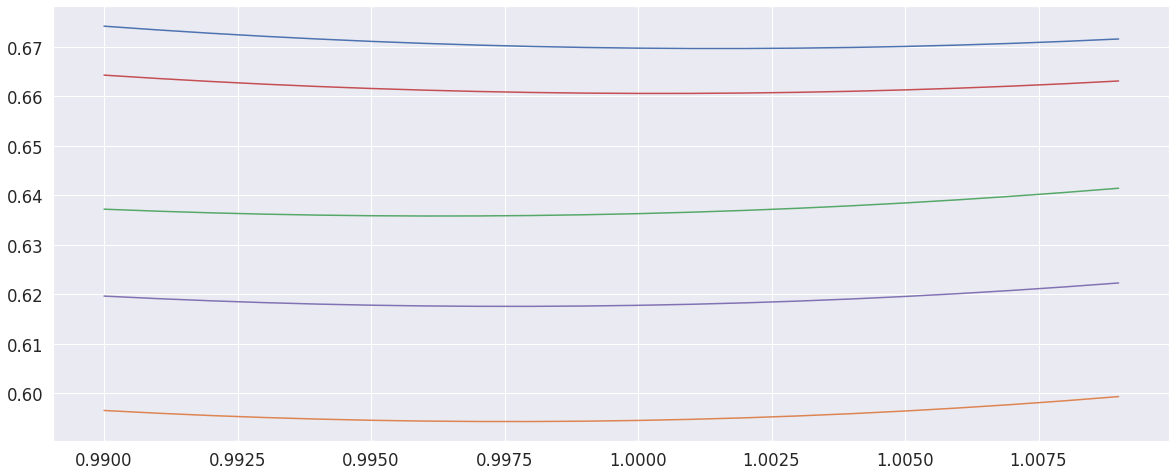

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
err = []
y_pred_tot_rf = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = RandomForestRegressor(bootstrap=True, max_features=0.45, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=42)
    m.fit(x_train, y_train)
    pred_y = m.predict(x_val)*0.999
    pred_x=m.predict(x_train)
    print("weight correction")
    W=[(0.990+(i/1000)) for i in range(20)]
    S =[]
    for w in W:
        error = rmse(y_val,pred_y*w)
        #print('RMSE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print ('Best weight for Score:{}'.format(BS))
    print(i, " err_rf: ",  rmse(y_val,pred_y))
    print(i, " err_rf: ",  rmse(y_train,pred_x))
    err.append(rmse(y_val,pred_y))
    pred_test = m.predict(test)
    i = i + 1
    y_pred_tot_rf.append(pred_test)
(err[0]+err[1]+err[2]+err[3]+err[4])/5

weight correction
Best weight for Score:1.0    0.66967
dtype: float64
1  err_rf:  0.6696704921272952
1  err_rf:  0.305986800585129
weight correction
Best weight for Score:0.997    0.594306
dtype: float64
2  err_rf:  0.5947521184991782
2  err_rf:  0.3118941792251623
weight correction
Best weight for Score:0.995    0.635826
dtype: float64
3  err_rf:  0.6365953241151141
3  err_rf:  0.3054299941096975
weight correction
Best weight for Score:0.999    0.66059
dtype: float64
4  err_rf:  0.6605963708494823
4  err_rf:  0.30374971533303746
weight correction
Best weight for Score:0.997    0.617574
dtype: float64
5  err_rf:  0.6179946848004321
5  err_rf:  0.30565774007102625


0.6359217980783004

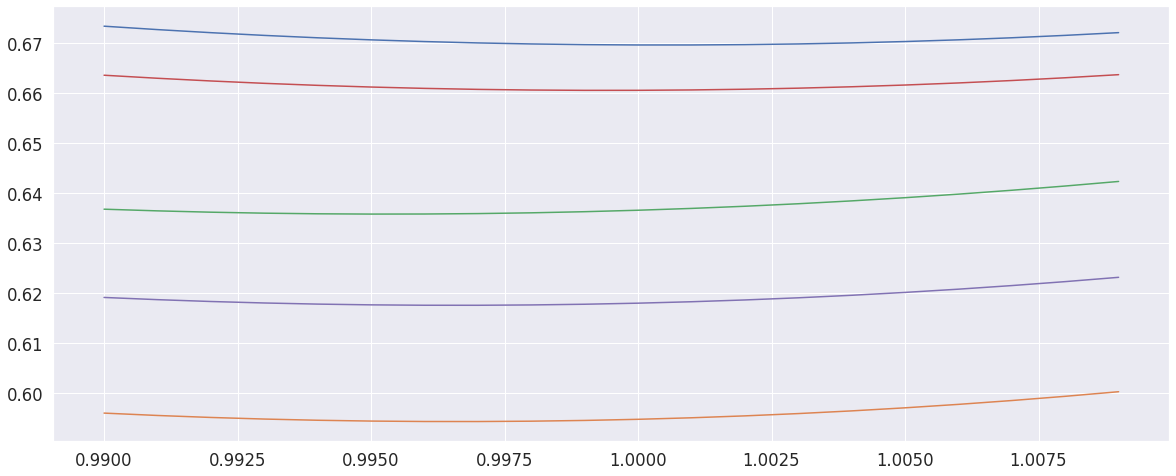

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
err = []
y_pred_tot_rf = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = RandomForestRegressor(bootstrap=True, max_features=0.45, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=42)
    m.fit(x_train, y_train)
    pred_y = m.predict(x_val)
    pred_x=m.predict(x_train)
    print("weight correction")
    W=[(0.990+(i/1000)) for i in range(20)]
    S =[]
    for w in W:
        error = rmse(y_val,pred_y*w)
        #print('RMSE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print ('Best weight for Score:{}'.format(BS))
    print(i, " err_rf: ",  rmse(y_val,pred_y))
    print(i, " err_rf: ",  rmse(y_train,pred_x))
    err.append(rmse(y_val,pred_y))
    pred_test = m.predict(test)
    i = i + 1
    y_pred_tot_rf.append(pred_test)
(err[0]+err[1]+err[2]+err[3]+err[4])/5

# Final Model on all Train Data on RandomForest

In [ ]:
m = RandomForestRegressor(bootstrap=True, max_features=0.45, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=2020)
m.fit(x,y)
rfpred = m.predict(test)*0.999

# The second Model Is LGBM

In [ ]:
from lightgbm import LGBMRegressor
err = []
y_pred_tot_lgbm = []


fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    m = LGBMRegressor(n_estimators=1000, num_leaves=127, max_depth=8,min_child_samples=4,
                      learning_rate=0.02, colsample_bytree=0.4, reg_alpha=0.5, reg_lambda=2)
    m.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=100,verbose=200,#eval_metric=rmsle(y_val,pred_y)
         )
    pred_y = m.predict(x_val)
    print(i, " err_lgbm: ",  rmse(y_val,pred_y))
    err.append(rmse(y_val,pred_y))
    pred_test = m.predict(test)
    i = i + 1
    y_pred_tot_lgbm.append(pred_test)
sum(err)/5

Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.1365	valid_1's l2: 0.467297
[400]	training's l2: 0.0686272	valid_1's l2: 0.458806
[600]	training's l2: 0.0425214	valid_1's l2: 0.458379
Early stopping, best iteration is:
[510]	training's l2: 0.0526054	valid_1's l2: 0.456796
1  err_lgbm:  0.6758666259320405
Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.141631	valid_1's l2: 0.350407
[400]	training's l2: 0.0682722	valid_1's l2: 0.342649
Early stopping, best iteration is:
[374]	training's l2: 0.0740112	valid_1's l2: 0.341812
2  err_lgbm:  0.5846469476327886
Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.137388	valid_1's l2: 0.414744
Early stopping, best iteration is:
[260]	training's l2: 0.104749	valid_1's l2: 0.411368
3  err_lgbm:  0.6413801185480221
Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.133816	valid_1's l2: 0.434264
[400]	train

0.6346223554907401

# Final Model on All train data for LGBM

In [ ]:
m = LGBMRegressor(n_estimators=325, num_leaves=127, max_depth=8,min_child_samples=4,
                      learning_rate=0.02, colsample_bytree=0.4, reg_alpha=0.5, reg_lambda=2,random_state=2020)
m.fit(x,y)
lgbpred=m.predict(test)

In [ ]:
Pedicted_dataset = pd.DataFrame({'lgbpred': list(lgbpred), 'rfpred': list(rfpred)}, columns=['lgbpred', 'rfpred'])
Pedicted_dataset.head()

,lgbpred,rfpred
0,7.418172,7.235288
1,6.172720,6.194167
2,6.633724,6.675236
3,5.986928,6.043803
4,6.603806,6.676571


In [ ]:
Pedicted_dataset['Averageof2converted'] = np.exp(0.45*Pedicted_dataset['lgbpred']+0.55*Pedicted_dataset['rfpred'])

In [ ]:
Pedicted_dataset.head()

,lgbpred,rfpred,Averageof2converted
0,7.418172,7.235288,1506.562469
1,6.172720,6.194167,485.177923
2,6.633724,6.675236,777.867073
3,5.986928,6.043803,410.842178
4,6.603806,6.676571,768.028460


In [ ]:
final_submission['Selling_Price'] = Pedicted_dataset['Averageof2converted']

In [ ]:
final_submission.head()

,Selling_Price
0,1506.562469
1,485.177923
2,777.867073
3,410.842178
4,768.028460


# Cross Validating Blending Accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
err = []
y_pred_tot_xgb = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1

for train_index, test_index in fold.split(x, y):
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    m = RandomForestRegressor(bootstrap=True, max_features=0.45, min_samples_leaf=1, min_samples_split=5, n_estimators=100,random_state=2020)
    m.fit(x_train, y_train)
    rfpred = m.predict(x_val)*0.999
    
    m = LGBMRegressor(n_estimators=442, num_leaves=127, max_depth=8,min_child_samples=4,
                      learning_rate=0.02, colsample_bytree=0.4, reg_alpha=0.5, reg_lambda=2,random_state=2020)
    m.fit(x_train, y_train)
    lgbpred=m.predict(x_val)*0.999
    average=0.55*rfpred+0.45*lgbpred
    
    print(i, " err_xgb: ",  rmse(y_val,average))
    err.append(rmse(y_val,average))
    #pred_test = m.predict(test)
    i = i + 1
    #y_pred_tot_xgb.append(pred_test)
(err[0]+err[1]+err[2]+err[3]+err[4])/5

1  err_xgb:  0.6709096481414472
2  err_xgb:  0.5894646245770954
3  err_xgb:  0.6390411837422934
4  err_xgb:  0.6510106634434962
5  err_xgb:  0.6178541302817465


0.6336560500372157

In [ ]:
# final_submission.to_csv(datapath + '/Final_Sub_Blended.csv',index=False)
# final_submission.to_excel(datapath + '/Final_Sub_Blended.xlsx',index=False)

In [ ]:
################################################ Thank You ##########################################################